In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

In [3]:
# Setup Alpaca API environment
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [60]:
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2022-08-31", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-09-01", tz="America/New_York").isoformat()

# Set the stock tickers
tickers = ["TSLA", "AMZN", "MSFT"]

# Get 1 year's worth of historical data for all stocks
# HINT: Set "limit" to at least 10000 so all ticker rows are captured from get_bars()
df_portfolio = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_portfolio.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-08-31 04:00:00+00:00,129.45,130.59,126.74,126.77,53637422,504038,127.924260,AMZN
2022-09-01 04:00:00+00:00,126.00,128.02,123.66,127.82,56640670,571386,125.864741,AMZN
2022-09-02 04:00:00+00:00,129.50,131.38,126.39,127.51,57418905,545154,128.735341,AMZN
2022-09-06 04:00:00+00:00,127.92,128.62,124.74,126.11,43870751,511459,126.275179,AMZN
2022-09-07 04:00:00+00:00,126.12,129.82,125.40,129.48,48025041,411010,128.155254,AMZN


In [61]:
df_portfolio.tail()


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2023-08-28 04:00:00+00:00,242.58,244.3800,235.35,238.82,107803523,1148394,238.599317,TSLA
2023-08-29 04:00:00+00:00,238.58,257.4800,237.77,257.18,134288354,1421107,250.641497,TSLA
2023-08-30 04:00:00+00:00,254.20,260.5100,250.59,256.90,122080522,1297017,255.874729,TSLA
2023-08-31 04:00:00+00:00,255.98,261.1800,255.05,258.08,108861789,1066702,258.034740,TSLA
2023-09-01 04:00:00+00:00,257.26,259.0794,242.01,245.01,132603144,1530008,248.276261,TSLA


In [27]:
#df_ticker.set_index(pd.to_datetime(df_ticker['timestamp'], infer_datetime_format=True), inplace=True)


In [62]:
# Drop unneede cloumns
df_portfolio = df_portfolio.drop(columns=["open", "high", "low", "volume", "trade_count", "vwap"])
df_ticker.head()

symbol,AMZN,MSFT,TSLA
timestamp,,,
2022-08-31 04:00:00+00:00,126.77,261.47,275.61
2022-09-01 04:00:00+00:00,127.82,260.40,277.16
2022-09-02 04:00:00+00:00,127.51,256.06,270.21
2022-09-06 04:00:00+00:00,126.11,253.25,274.42
2022-09-07 04:00:00+00:00,129.48,258.09,283.70


In [7]:
# to reset index
df_portfolio = df_portfolio.reset_index()

In [63]:
df_portfolio = df_portfolio.pivot_table(values="close", index="timestamp", columns="symbol")
df_portfolio.head()

symbol,AMZN,MSFT,TSLA
timestamp,,,
2022-08-31 04:00:00+00:00,126.77,261.47,275.61
2022-09-01 04:00:00+00:00,127.82,260.40,277.16
2022-09-02 04:00:00+00:00,127.51,256.06,270.21
2022-09-06 04:00:00+00:00,126.11,253.25,274.42
2022-09-07 04:00:00+00:00,129.48,258.09,283.70


In [64]:
# Calculate daily returns and Drop NAs
df_daily_returns = df_portfolio.pct_change().dropna()

In [65]:
# Display sample data
df_daily_returns.sample


<bound method NDFrame.sample of symbol                         AMZN      MSFT      TSLA
timestamp                                              
2022-09-01 04:00:00+00:00  0.008283 -0.004092  0.005624
2022-09-02 04:00:00+00:00 -0.002425 -0.016667 -0.025076
2022-09-06 04:00:00+00:00 -0.010980 -0.010974  0.015580
2022-09-07 04:00:00+00:00  0.026723  0.019112  0.033817
2022-09-08 04:00:00+00:00  0.002626  0.001666  0.019598
...                             ...       ...       ...
2023-08-28 04:00:00+00:00 -0.000900  0.002229  0.000964
2023-08-29 04:00:00+00:00  0.013294  0.014551  0.076878
2023-08-30 04:00:00+00:00  0.001186  0.001157 -0.001089
2023-08-31 04:00:00+00:00  0.021766 -0.003133  0.004593
2023-09-01 04:00:00+00:00  0.000797  0.002746 -0.050643

[252 rows x 3 columns]>

In [66]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = df_daily_returns.dot(weights)

# Display sample data
portfolio_returns.head()

timestamp
2022-09-01 04:00:00+00:00    0.003271
2022-09-02 04:00:00+00:00   -0.014723
2022-09-06 04:00:00+00:00   -0.002124
2022-09-07 04:00:00+00:00    0.026550
2022-09-08 04:00:00+00:00    0.007963
dtype: float64

In [67]:
# Join your returns DataFrame to the original returns DataFrame
Joint_Returns_df = pd.concat([df_daily_returns, portfolio_returns], axis="columns", join="inner")
Joint_Returns_df

,AMZN,MSFT,TSLA,0
timestamp,,,,
2022-09-01 04:00:00+00:00,0.008283,-0.004092,0.005624,0.003271
2022-09-02 04:00:00+00:00,-0.002425,-0.016667,-0.025076,-0.014723
2022-09-06 04:00:00+00:00,-0.010980,-0.010974,0.015580,-0.002124
2022-09-07 04:00:00+00:00,0.026723,0.019112,0.033817,0.026550
2022-09-08 04:00:00+00:00,0.002626,0.001666,0.019598,0.007963
...,...,...,...,...
2023-08-28 04:00:00+00:00,-0.000900,0.002229,0.000964,0.000764
2023-08-29 04:00:00+00:00,0.013294,0.014551,0.076878,0.034908
2023-08-30 04:00:00+00:00,0.001186,0.001157,-0.001089,0.000418


In [68]:
# Rename the columns to match the corresponding stock
Joint_Returns_df.columns = ['AMZN', 'MSFT', 'TSLA' , 'Return']
Joint_Returns_df.head()

,AMZN,MSFT,TSLA,Return
timestamp,,,,
2022-09-01 04:00:00+00:00,0.008283,-0.004092,0.005624,0.003271
2022-09-02 04:00:00+00:00,-0.002425,-0.016667,-0.025076,-0.014723
2022-09-06 04:00:00+00:00,-0.010980,-0.010974,0.015580,-0.002124
2022-09-07 04:00:00+00:00,0.026723,0.019112,0.033817,0.026550
2022-09-08 04:00:00+00:00,0.002626,0.001666,0.019598,0.007963


In [69]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# already done

<Axes: xlabel='timestamp'>

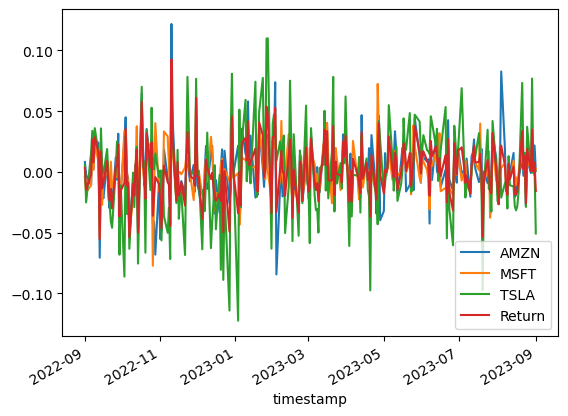

In [70]:
Joint_Returns_df.plot()

In [71]:
# Calculate the annualized `std`
Joint_Returns_std = Joint_Returns_df.std()
Joint_Returns_std.head()

AMZN      0.024728
MSFT      0.019653
TSLA      0.038067
Return    0.022223
dtype: float64

In [72]:
import numpy as np

In [73]:
annualized_std = Joint_Returns_std * np.sqrt(252)
annualized_std.head()

AMZN      0.392549
MSFT      0.311987
TSLA      0.604297
Return    0.352778
dtype: float64

<Axes: xlabel='timestamp'>

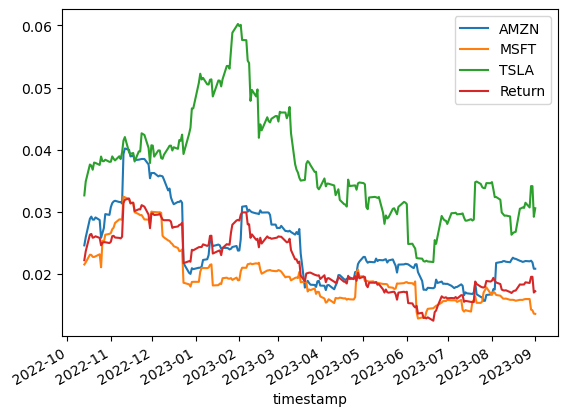

In [85]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
Joint_Returns_df.rolling(window=30).std().plot()

In [76]:
# Calculate and plot the correlation
correlation = Joint_Returns_df.corr()
correlation

,AMZN,MSFT,TSLA,Return
AMZN,1.000000,0.679537,0.426128,0.814548
MSFT,0.679537,1.000000,0.357628,0.751041
TSLA,0.426128,0.357628,1.000000,0.834471
Return,0.814548,0.751041,0.834471,1.000000


<Axes: >

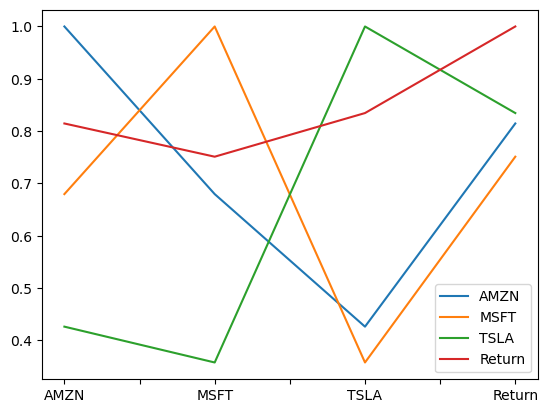

In [77]:
correlation.plot()

In [78]:

# Calculate covariance
covariance = df_daily_returns.cov()
covariance

symbol,AMZN,MSFT,TSLA
symbol,,,
AMZN,0.000611,0.000330,0.000401
MSFT,0.000330,0.000386,0.000268
TSLA,0.000401,0.000268,0.001449


In [79]:
# Calculate variance of the S&P 500
variance = df_daily_returns.var()
variance

symbol
AMZN    0.000611
MSFT    0.000386
TSLA    0.001449
dtype: float64

In [80]:
# Calculate and plot Beta
df_daily_returns_beta = covariance / variance
df_daily_returns_beta

symbol,AMZN,MSFT,TSLA
symbol,,,
AMZN,1.000000,0.85501,0.276811
MSFT,0.540077,1.00000,0.184636
TSLA,0.655988,0.69270,1.000000


In [81]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (df_daily_returns.mean() * 252) / (annualized_std * np.sqrt(252))
sharpe_ratios.head()

AMZN      0.026006
MSFT      0.055943
Return         NaN
TSLA      0.006803
dtype: float64

In [82]:
# Drop nulls
sharpe_ratios = sharpe_ratios.dropna()

<Axes: >

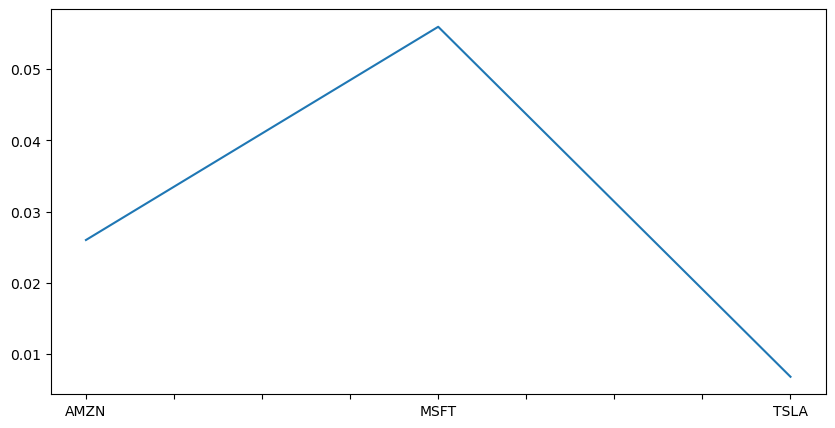

In [83]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(figsize=(10,5))

In [84]:
df_daily_returns

symbol,AMZN,MSFT,TSLA
timestamp,,,
2022-09-01 04:00:00+00:00,0.008283,-0.004092,0.005624
2022-09-02 04:00:00+00:00,-0.002425,-0.016667,-0.025076
2022-09-06 04:00:00+00:00,-0.010980,-0.010974,0.015580
2022-09-07 04:00:00+00:00,0.026723,0.019112,0.033817
2022-09-08 04:00:00+00:00,0.002626,0.001666,0.019598
...,...,...,...
2023-08-28 04:00:00+00:00,-0.000900,0.002229,0.000964
2023-08-29 04:00:00+00:00,0.013294,0.014551,0.076878
2023-08-30 04:00:00+00:00,0.001186,0.001157,-0.001089
